<a href="https://colab.research.google.com/github/AditiCoderElite/Air-Quality-Analysis---Correlation-/blob/main/Air_Quality_Analysis_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Quality Analysis - Correlation

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset.
csv_file = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/air-quality/AirQualityUCI.csv'
df = pd.read_csv(csv_file, sep=';')

# Dropping the 'Unnamed: 15' & 'Unnamed: 16' columns.
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], axis=1)

# Dropping the null values.
df = df.dropna()

# Creating a Pandas series containing 'datetime' objects.
dt_series = pd.Series(data = [item.split("/")[2] + "-" + item.split("/")[1] + "-" + item.split("/")[0] for item in df['Date']], index=df.index) + ' ' + pd.Series(data=[str(item).replace(".", ":") for item in df['Time']], index=df.index)
dt_series = pd.to_datetime(dt_series)

# Remove the Date & Time columns from the DataFrame and insert the 'dt_series' in it.
df = df.drop(columns=['Date', 'Time'], axis=1)
df.insert(loc=0, column='DateTime', value=dt_series)

# Get the Pandas series containing the year values as integers.
year_series = dt_series.dt.year

# Get the Pandas series containing the month values as integers.
month_series = dt_series.dt.month

# Get the Pandas series containing the day values as integers.
day_series = dt_series.dt.day

# Get the Pandas series containing the days of a week, i.e., Monday, Tuesday, Wednesday etc.
day_name_series = dt_series.dt.day_name()

# Add the 'Year', 'Month', 'Day' and 'Day Name' columns to the DataFrame.
df['Year'] = year_series
df['Month'] = month_series
df['Day'] = day_series
df['Day Name'] = day_name_series

# Sort the DataFrame by the 'DateTime' values in the ascending order. Also, display the first 10 rows of the DataFrame.
df = df.sort_values(by='DateTime')

# Create a function to replace the commas with periods in a Pandas series.
def comma_to_period(series):
    new_series = pd.Series(data=[float(str(item).replace(',', '.')) for item in series], index=df.index)
    return new_series

# Apply the 'comma_to_period()' function on the ''CO(GT)', 'C6H6(GT)', 'T', 'RH' and 'AH' columns.
cols_to_correct = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH'] # Create a list of column names.
for col in cols_to_correct: # Iterate through each column
    df[col] = comma_to_period(df[col]) # Replace the original column with the new series.

# Remove all the columns from the 'df' DataFrame containing more than 10% garbage value.
df = df.drop(columns=['NMHC(GT)', 'CO(GT)', 'NOx(GT)', 'NO2(GT)'], axis=1)

# Create a new DataFrame containing records for the years 2004 and 2005.
aq_2004_df = df[df['Year'] == 2004]
aq_2005_df = df[df['Year'] == 2005]

# Replace the -200 value with the median values for each column having indices between 1 and -4 (excluding -4) for the 2004 year DataFrame.
for col in aq_2004_df.columns[1:-4]:
  median = aq_2004_df.loc[aq_2004_df[col] != -200, col].median()
  aq_2004_df[col] = aq_2004_df[col].replace(to_replace=-200, value=median)

# Repeat the same exercise for the 2005 year DataFrame.
for col in aq_2005_df.columns[1:-4]:
  median = aq_2005_df.loc[aq_2005_df[col] != -200, col].median()
  aq_2005_df[col] = aq_2005_df[col].replace(to_replace=-200, value=median)

# Group the DataFrames about the 'Month' column.
group_2004_month = aq_2004_df.groupby(by='Month')
group_2005_month = aq_2005_df.groupby(by='Month')

# Concatenate the two DataFrames for 2004 and 2005 to obtain one DataFrame.
df = pd.concat([aq_2004_df, aq_2005_df])

# Information of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       9357 non-null   datetime64[ns]
 1   PT08.S1(CO)    9357 non-null   float64       
 2   C6H6(GT)       9357 non-null   float64       
 3   PT08.S2(NMHC)  9357 non-null   float64       
 4   PT08.S3(NOx)   9357 non-null   float64       
 5   PT08.S4(NO2)   9357 non-null   float64       
 6   PT08.S5(O3)    9357 non-null   float64       
 7   T              9357 non-null   float64       
 8   RH             9357 non-null   float64       
 9   AH             9357 non-null   float64       
 10  Year           9357 non-null   int64         
 11  Month          9357 non-null   int64         
 12  Day            9357 non-null   int64         
 13  Day Name       9357 non-null   object        
dtypes: datetime64[ns](1), float64(9), int64(3), object(1)
memory usage: 1.1+

The description for all the columns containing data for air pollutants, temperature, relative humidity and absolute humidity is provided below.


|Columns|Description|
|-|-|
|PT08.S1(CO)|PT08.S1 (tin oxide) hourly averaged sensor response (nominally $\text{CO}$ targeted)|
|C6H6(GT)|True hourly averaged Benzene concentration in $\frac{\mu g}{m^3}$|
|PT08.S2(NMHC)|PT08.S2 (titania) hourly averaged sensor response (nominally $\text{NMHC}$ targeted)|
|PT08.S3(NOx)|PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally $\text{NO}_x$ targeted)|
|PT08.S4(NO2)|PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally $\text{NO}_2$ targeted)|
|PT08.S5(O3) |PT08.S5 (indium oxide) hourly averaged sensor response (nominally $\text{O}_3$ targeted)|
|T|Temperature in Â°C|
|RH|Relative Humidity (%)|
|AH|AH Absolute Humidity|

---

#### Correlation




In [2]:
def line_plot(width, height, x_values, y_values, color, label):
  plt.figure(figsize=(width, height))
  plt.plot(x_values, y_values, color=color, label=label)
  plt.legend()
  plt.show()

Line plot to visualise the monthly median concentration of carbon monoxide and ozone in the year 2005.

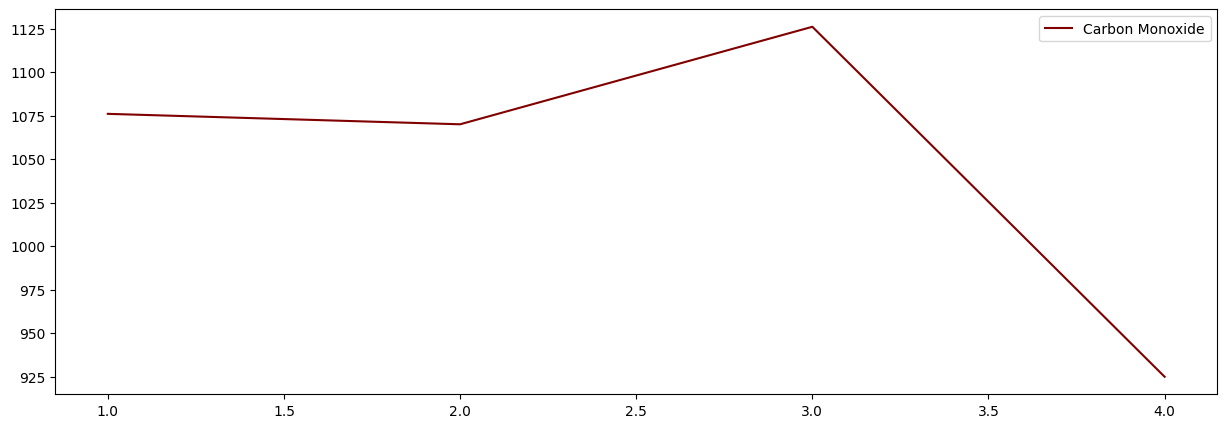

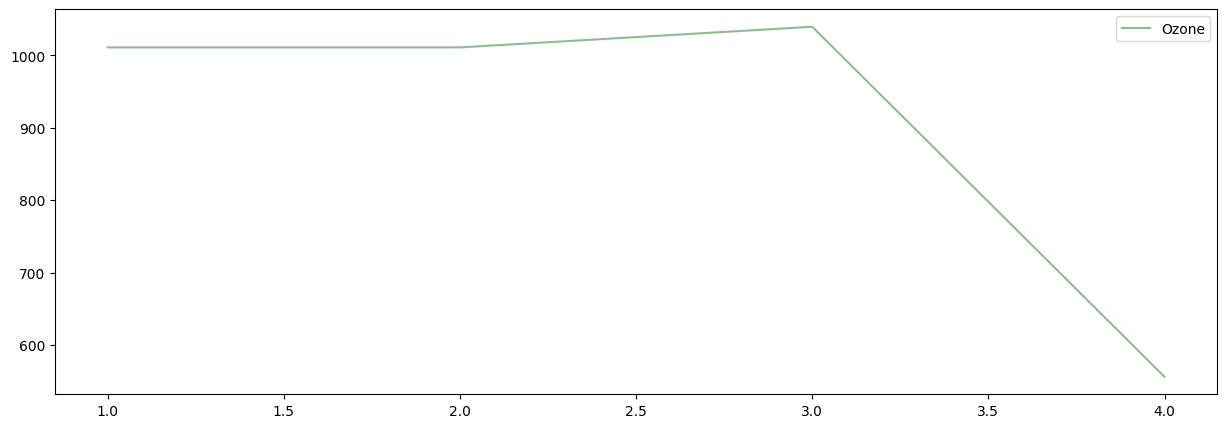

In [3]:
line_plot(15, 5, np.arange(1, 5), group_2005_month.median()['PT08.S1(CO)'], 'maroon', 'Carbon Monoxide')
line_plot(15, 5, np.arange(1, 5), group_2005_month.median()['PT08.S5(O3)'], 'darkseagreen', 'Ozone')

They follow almost the identical pattern. When the lines for the carbon monoxide graph go up, the lines for the ozone graph also go up and vice-versa. In other words, when the carbon monoxide values increase, the ozone values also increase and vice-versa.

This behaviour suggests a strong linear relationship between the two sets of values.



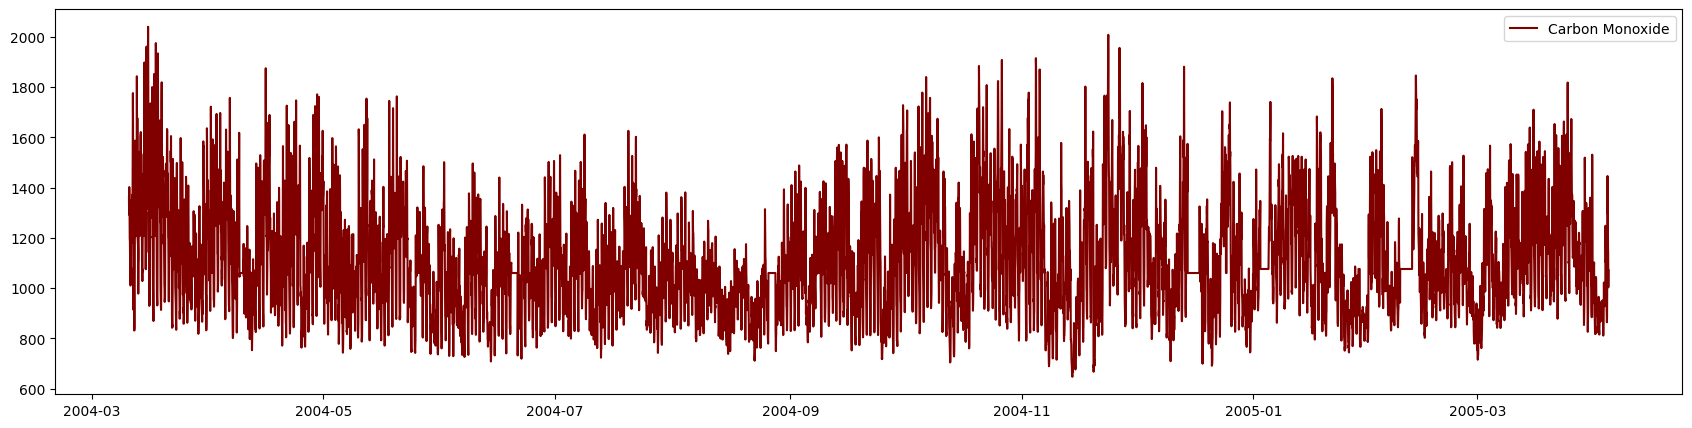

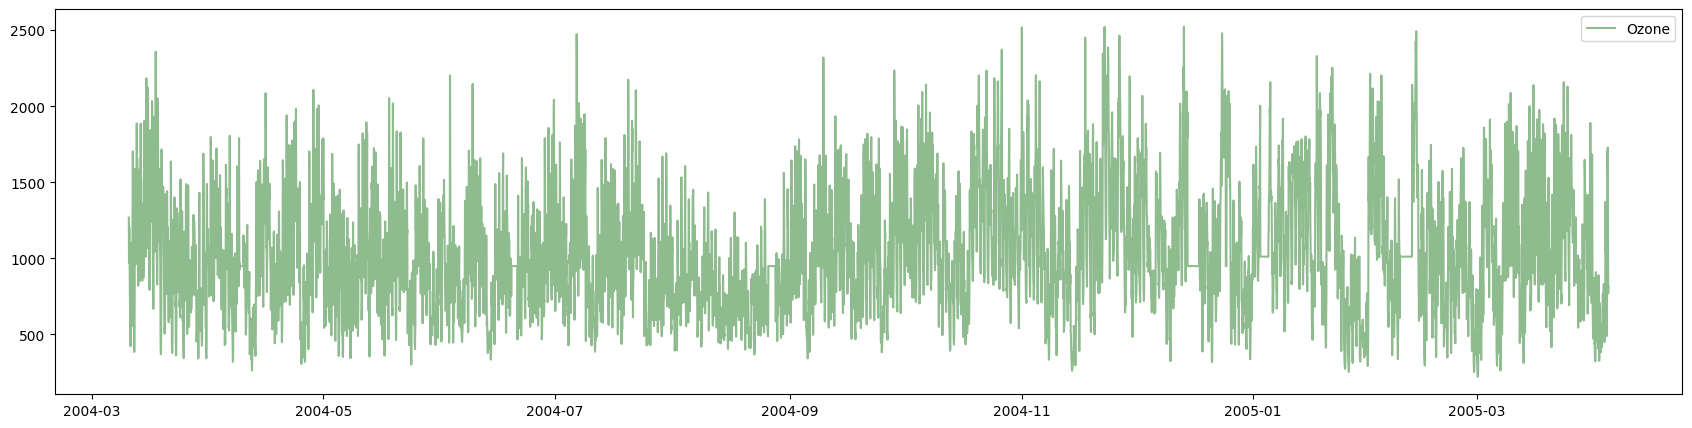

In [4]:
line_plot(21, 5, df['DateTime'], df['PT08.S1(CO)'], 'maroon', 'Carbon Monoxide')
line_plot(21, 5, df['DateTime'], df['PT08.S5(O3)'], 'darkseagreen', 'Ozone')

Scatter plot between the carbon monoxide and ozone columns to visualise the variation in their values as the values in one of the columns change.

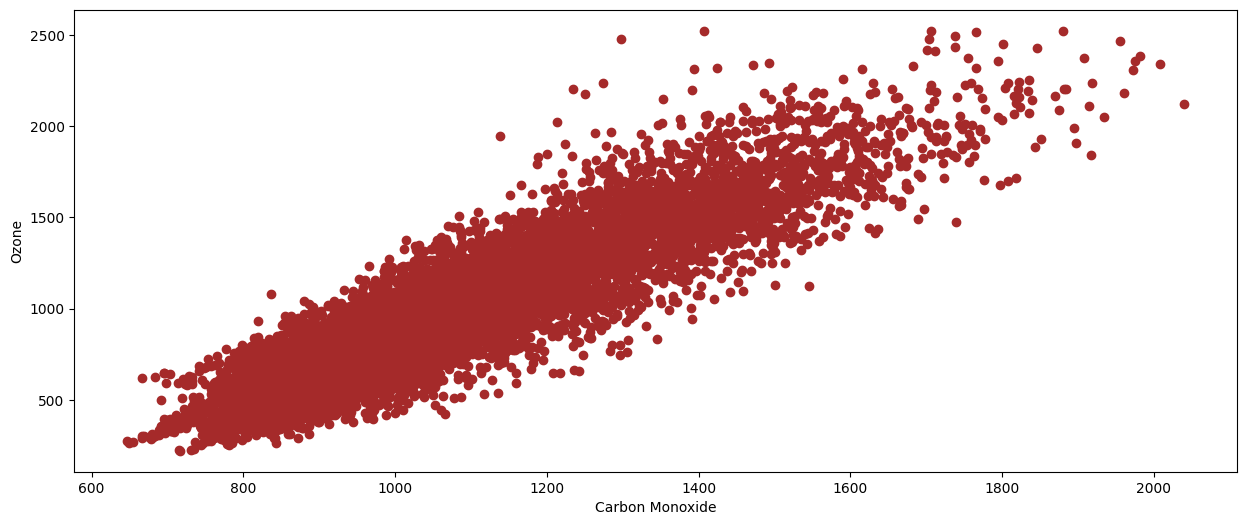

In [5]:
plt.figure(figsize=(15, 6))
plt.scatter(df['PT08.S1(CO)'], df['PT08.S5(O3)'], color='brown')
plt.xlabel('Carbon Monoxide')
plt.ylabel('Ozone')
plt.show()

As the carbon monoxide values increase, the ozone values also increase and vice-versa. So this behaviour suggests that due to some reason there is some kind of linear relationship between the two features. We don't know that reason but we can measure the strength of this linear relationship.

**The `regplot()` Function**



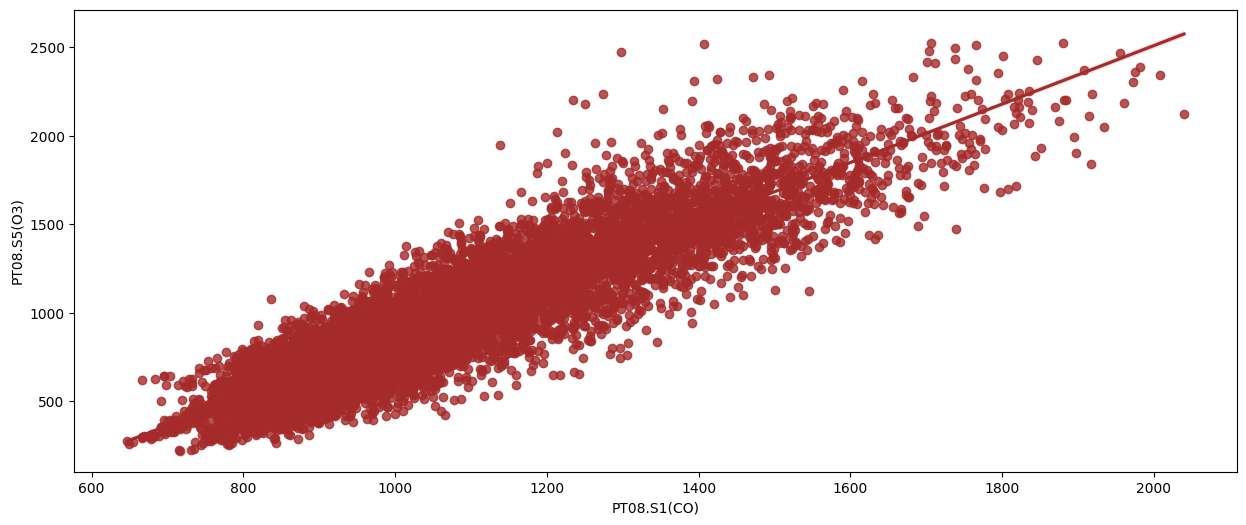

In [6]:
plt.figure(figsize=(15, 6))
sns.regplot(x='PT08.S1(CO)', y='PT08.S5(O3)', data=df, color='brown')
plt.show()

The regression line in the above graph has a positive slope. So this type of linear relationship is called a **positive** linear relationship. Hence, the $R$ value will be positive.

One interesting note, the positive linear relationship between carbon monoxide
and ozone is actually a good sign for us because these two gases may react in the atmosphere to form carbon dioxide and oxygen as shown in the reaction below.

$$CO + O_3 \longrightarrow CO_2 + O_2$$

In fact, many people affected with carbon monoxide poisoning are considered for treatment with ozone. The process of treating a patient having a disease using ozone is called ozone therapy. You can read about ozone therapy more by clicking on the link provided below.

[Ozone Therapy](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3312702/)

The American Journal of Public Health (AJPH) also proposes ozone therapy as a potential treatment for carbon monoxide poisoning which you can read by clicking on the link provided below.

[American Journal of Public Health](https://ajph.aphapublications.org/doi/pdf/10.2105/AJPH.17.3.255)


A relationship between two variables can also be opposite to each other, i.e., as one sets of values increase the other set of values decrease.

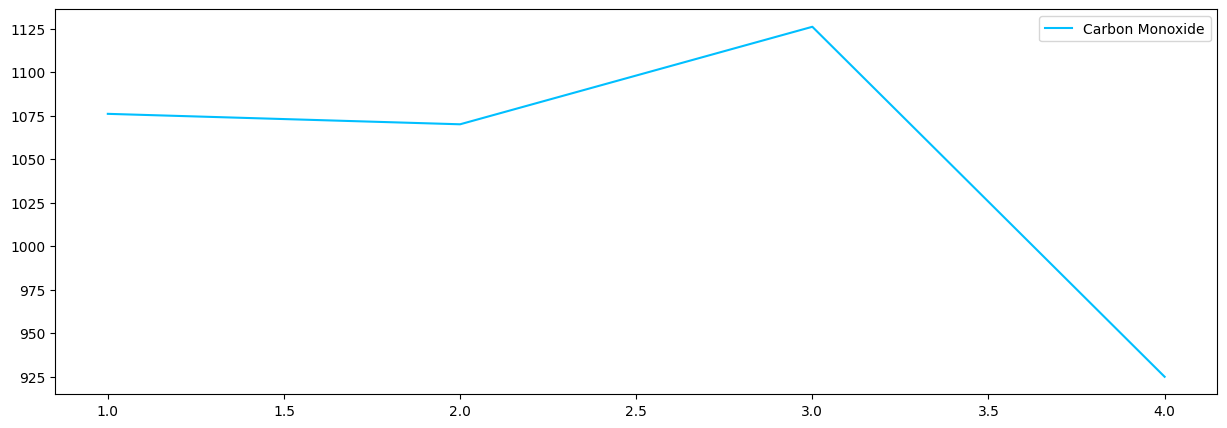

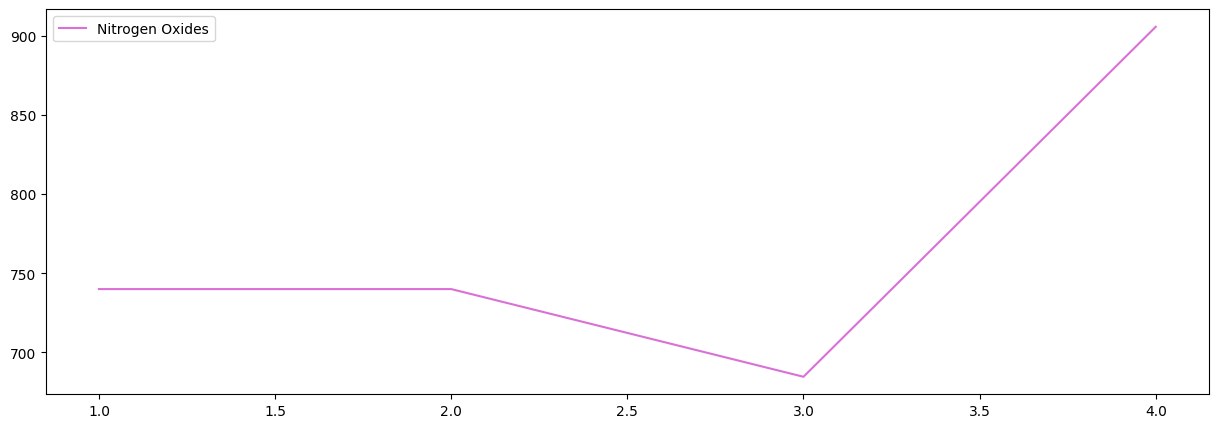

In [7]:
line_plot(15, 5, np.arange(1, 5), group_2005_month.median()['PT08.S1(CO)'], 'deepskyblue', 'Carbon Monoxide')
line_plot(15, 5, np.arange(1, 5), group_2005_month.median()['PT08.S3(NOx)'], 'orchid', 'Nitrogen Oxides')

As the lines for the carbon monoxide time series plot go up, the lines for the nitrogen oxides go down and vice-versa. The two time series graphs are almost mirror images of each other.



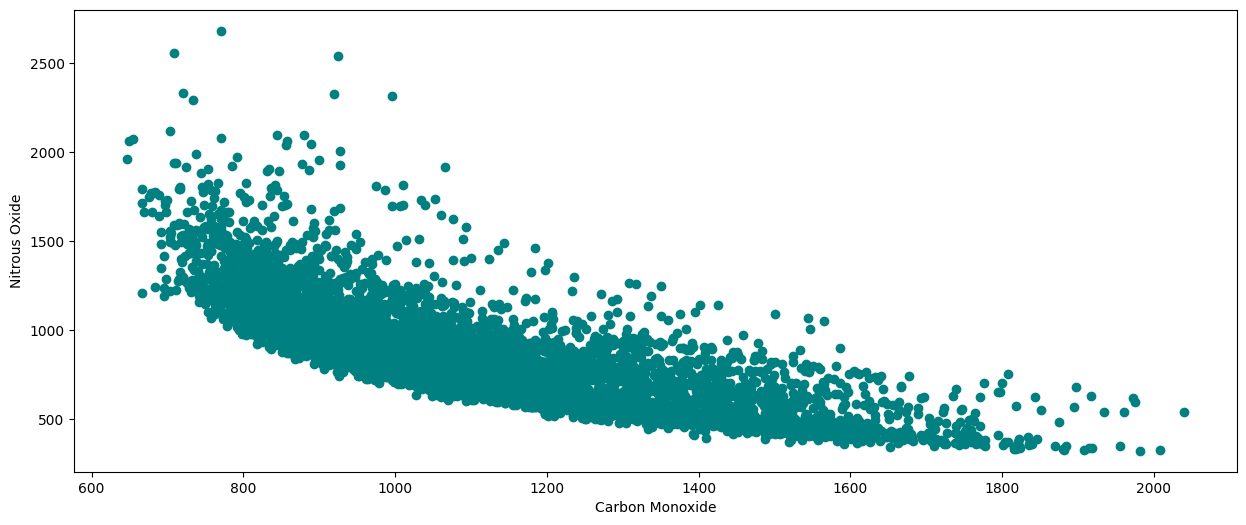

In [8]:
plt.figure(figsize=(15, 6))
plt.scatter(df['PT08.S1(CO)'], df['PT08.S3(NOx)'], color='teal')
plt.xlabel('Carbon Monoxide')
plt.ylabel('Nitrous Oxide')
plt.show()

The above graph suggests that as the values in one column increase, the values in the other column decrease and vice-versa. Again, we don't know the reason behind this relationship but we can measure the strength of this relationship.

This type of linear relationship is called a **negative** linear relationship.



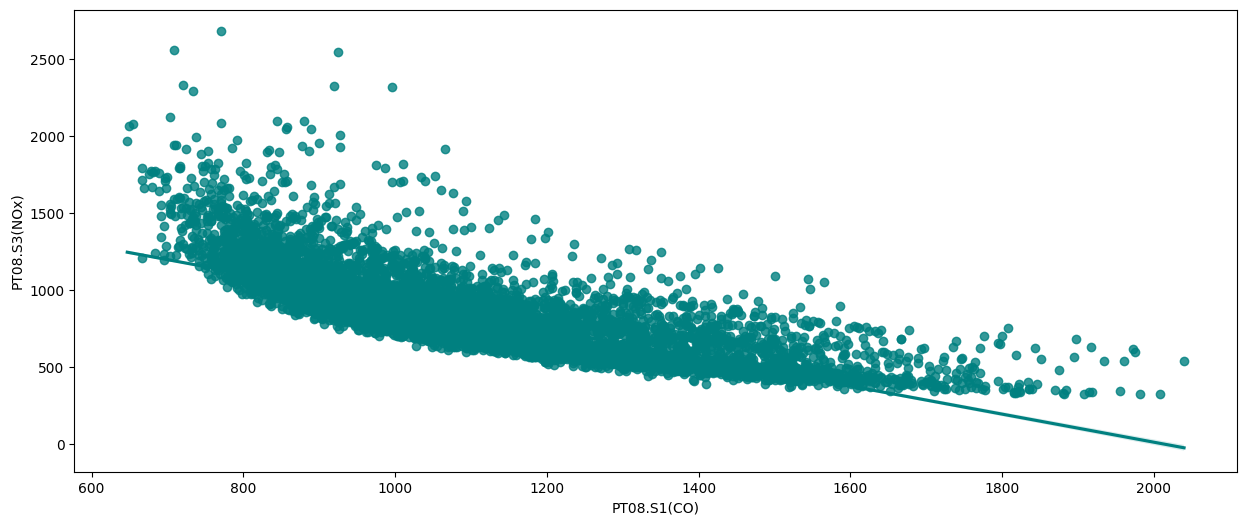

In [9]:
plt.figure(figsize=(15, 6))
sns.regplot(x='PT08.S1(CO)', y='PT08.S3(NOx)', data=df, color='teal')
plt.show()

The linear relationship (either negative or positive) between two features or sets of values is called **correlation**.

---

#### Correlation Coefficient

A correlation coefficient is a numeric values that range between $-1$ to $1$ including both. It tells us the strength (or degree) of a relationship between two sets of quantities or features. It is denoted by letter $R$.

- If $R > 0$, the two sets of values exhibit a **positive** linear relationship.

- If $R = 0$, the two sets of values exhibit a **no** linear relationship.

- If $R < 0$, the two sets of values exhibit a **negative** linear relationship.

To calculate the value of the correlation coefficient between two sets of values, use the `corrcoef()` function of the `numpy` module.

Correlation coefficient for the carbon monoxide & ozone columns.

In [10]:
np.corrcoef(df['PT08.S1(CO)'], df['PT08.S5(O3)'])

array([[1.        , 0.89936876],
       [0.89936876, 1.        ]])

Correlation coefficient for the correlation between carbon monoxide & nitrogen oxides columns.


In [11]:
np.corrcoef(df['PT08.S1(CO)'], df['PT08.S3(NOx)'])

array([[ 1.        , -0.76992041],
       [-0.76992041,  1.        ]])

**The `corr()` Function**



In [12]:
corr_df = df.iloc[:, 1:-4].corr()
corr_df

PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
PT08.S1(CO)       1.000000  0.882921       0.892097     -0.769920   
C6H6(GT)          0.882921  1.000000       0.981707     -0.730267   
PT08.S2(NMHC)     0.892097  0.981707       1.000000     -0.792370   
PT08.S3(NOx)     -0.769920 -0.730267      -0.792370      1.000000   
PT08.S4(NO2)      0.677392  0.764243       0.775995     -0.528111   
PT08.S5(O3)       0.899369  0.864326       0.879285     -0.795013   
T                 0.048765  0.203647       0.245397     -0.138125   
RH                0.114426 -0.062666      -0.091310     -0.057582   
AH                0.134961  0.172959       0.191374     -0.224756   

               PT08.S4(NO2)  PT08.S5(O3)         T        RH        AH  
PT08.S1(CO)        0.677392     0.899369  0.048765  0.114426  0.134961  
C6H6(GT)           0.764243     0.864326  0.203647 -0.062666  0.172959  
PT08.S2(NMHC)      0.775995     0.879285  0.245397 -0.091310  0.191374  
PT08.S3(NOx)      -0.528111    -0.795013 -0.138125 -0.057582 -0.224756  
PT08.S4(NO2)       1.000000     0.585281  0.568770 -0.034751  0.635471  
PT08.S5(O3)        0.585281     1.000000 -0.027593  0.124988  0.069730  
T                  0.568770    -0.027593  1.000000 -0.576271  0.661982  
RH                -0.034751     0.124988 -0.576271  1.000000  0.163933  
AH                 0.635471     0.069730  0.661982  0.163933  1.000000

**The `heatmap()` Function**


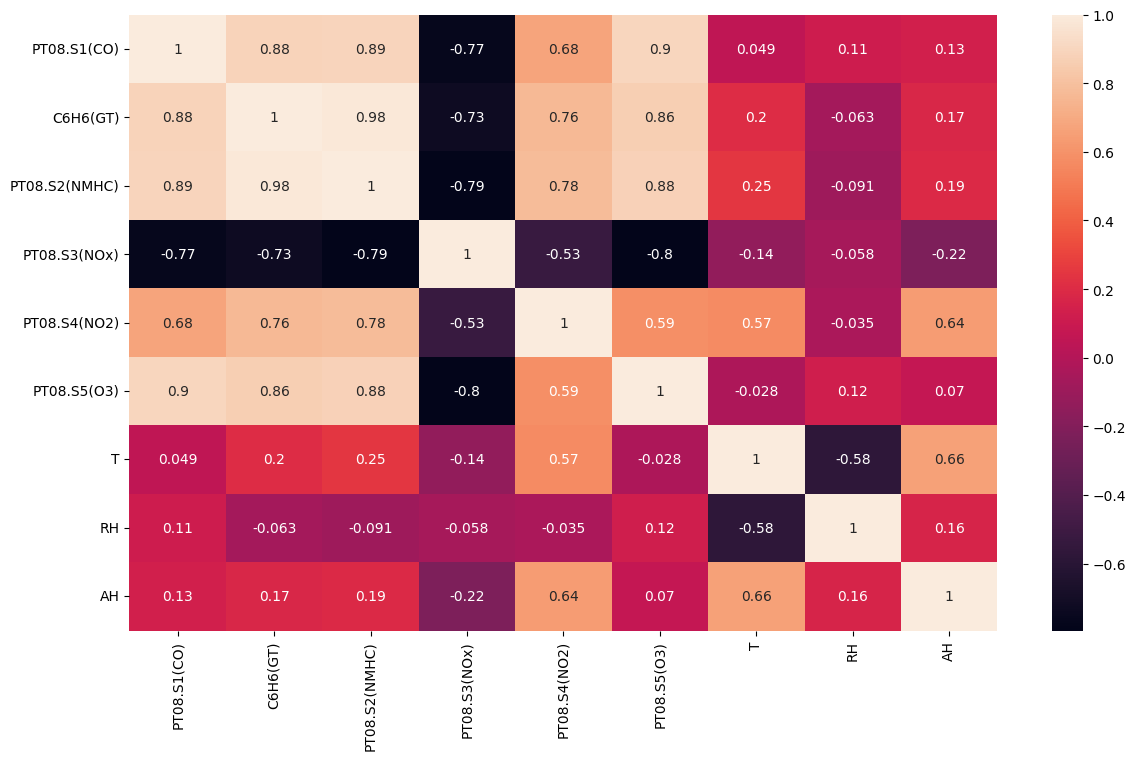

In [14]:
plt.figure(figsize=(14, 8))
sns.heatmap(data=corr_df, annot=True)
plt.show()

In the above heatmap, the cells having lighter colour densities denote greatest positive correlation between two columns and the cells having darker colour densities denote greatest negative correlation between two columns.


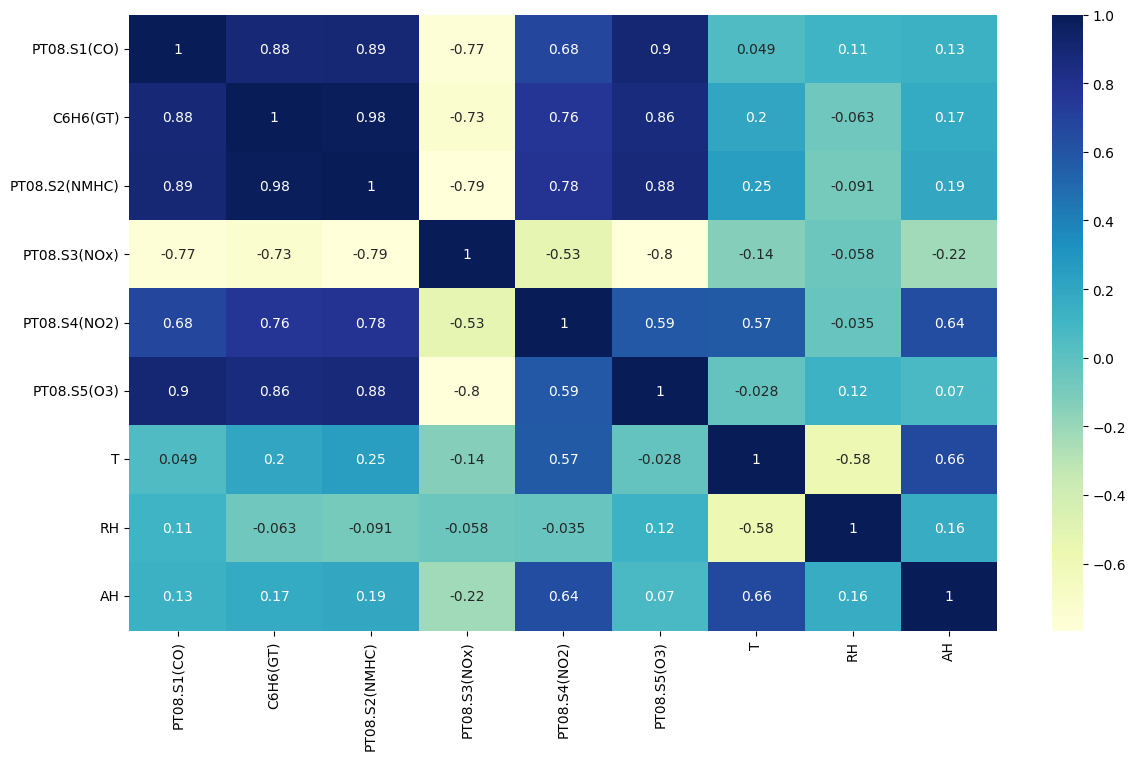

In [15]:
plt.figure(figsize=(14, 8))
sns.heatmap(data=corr_df, annot=True, cmap='YlGnBu')
plt.show()

In the above heatmap, this time, the cells having darker colour densities denote greatest positive correlation between two columns and the cells having lighter colour densities denote greatest negative correlation between two columns.


**The `pairplot()` Function**



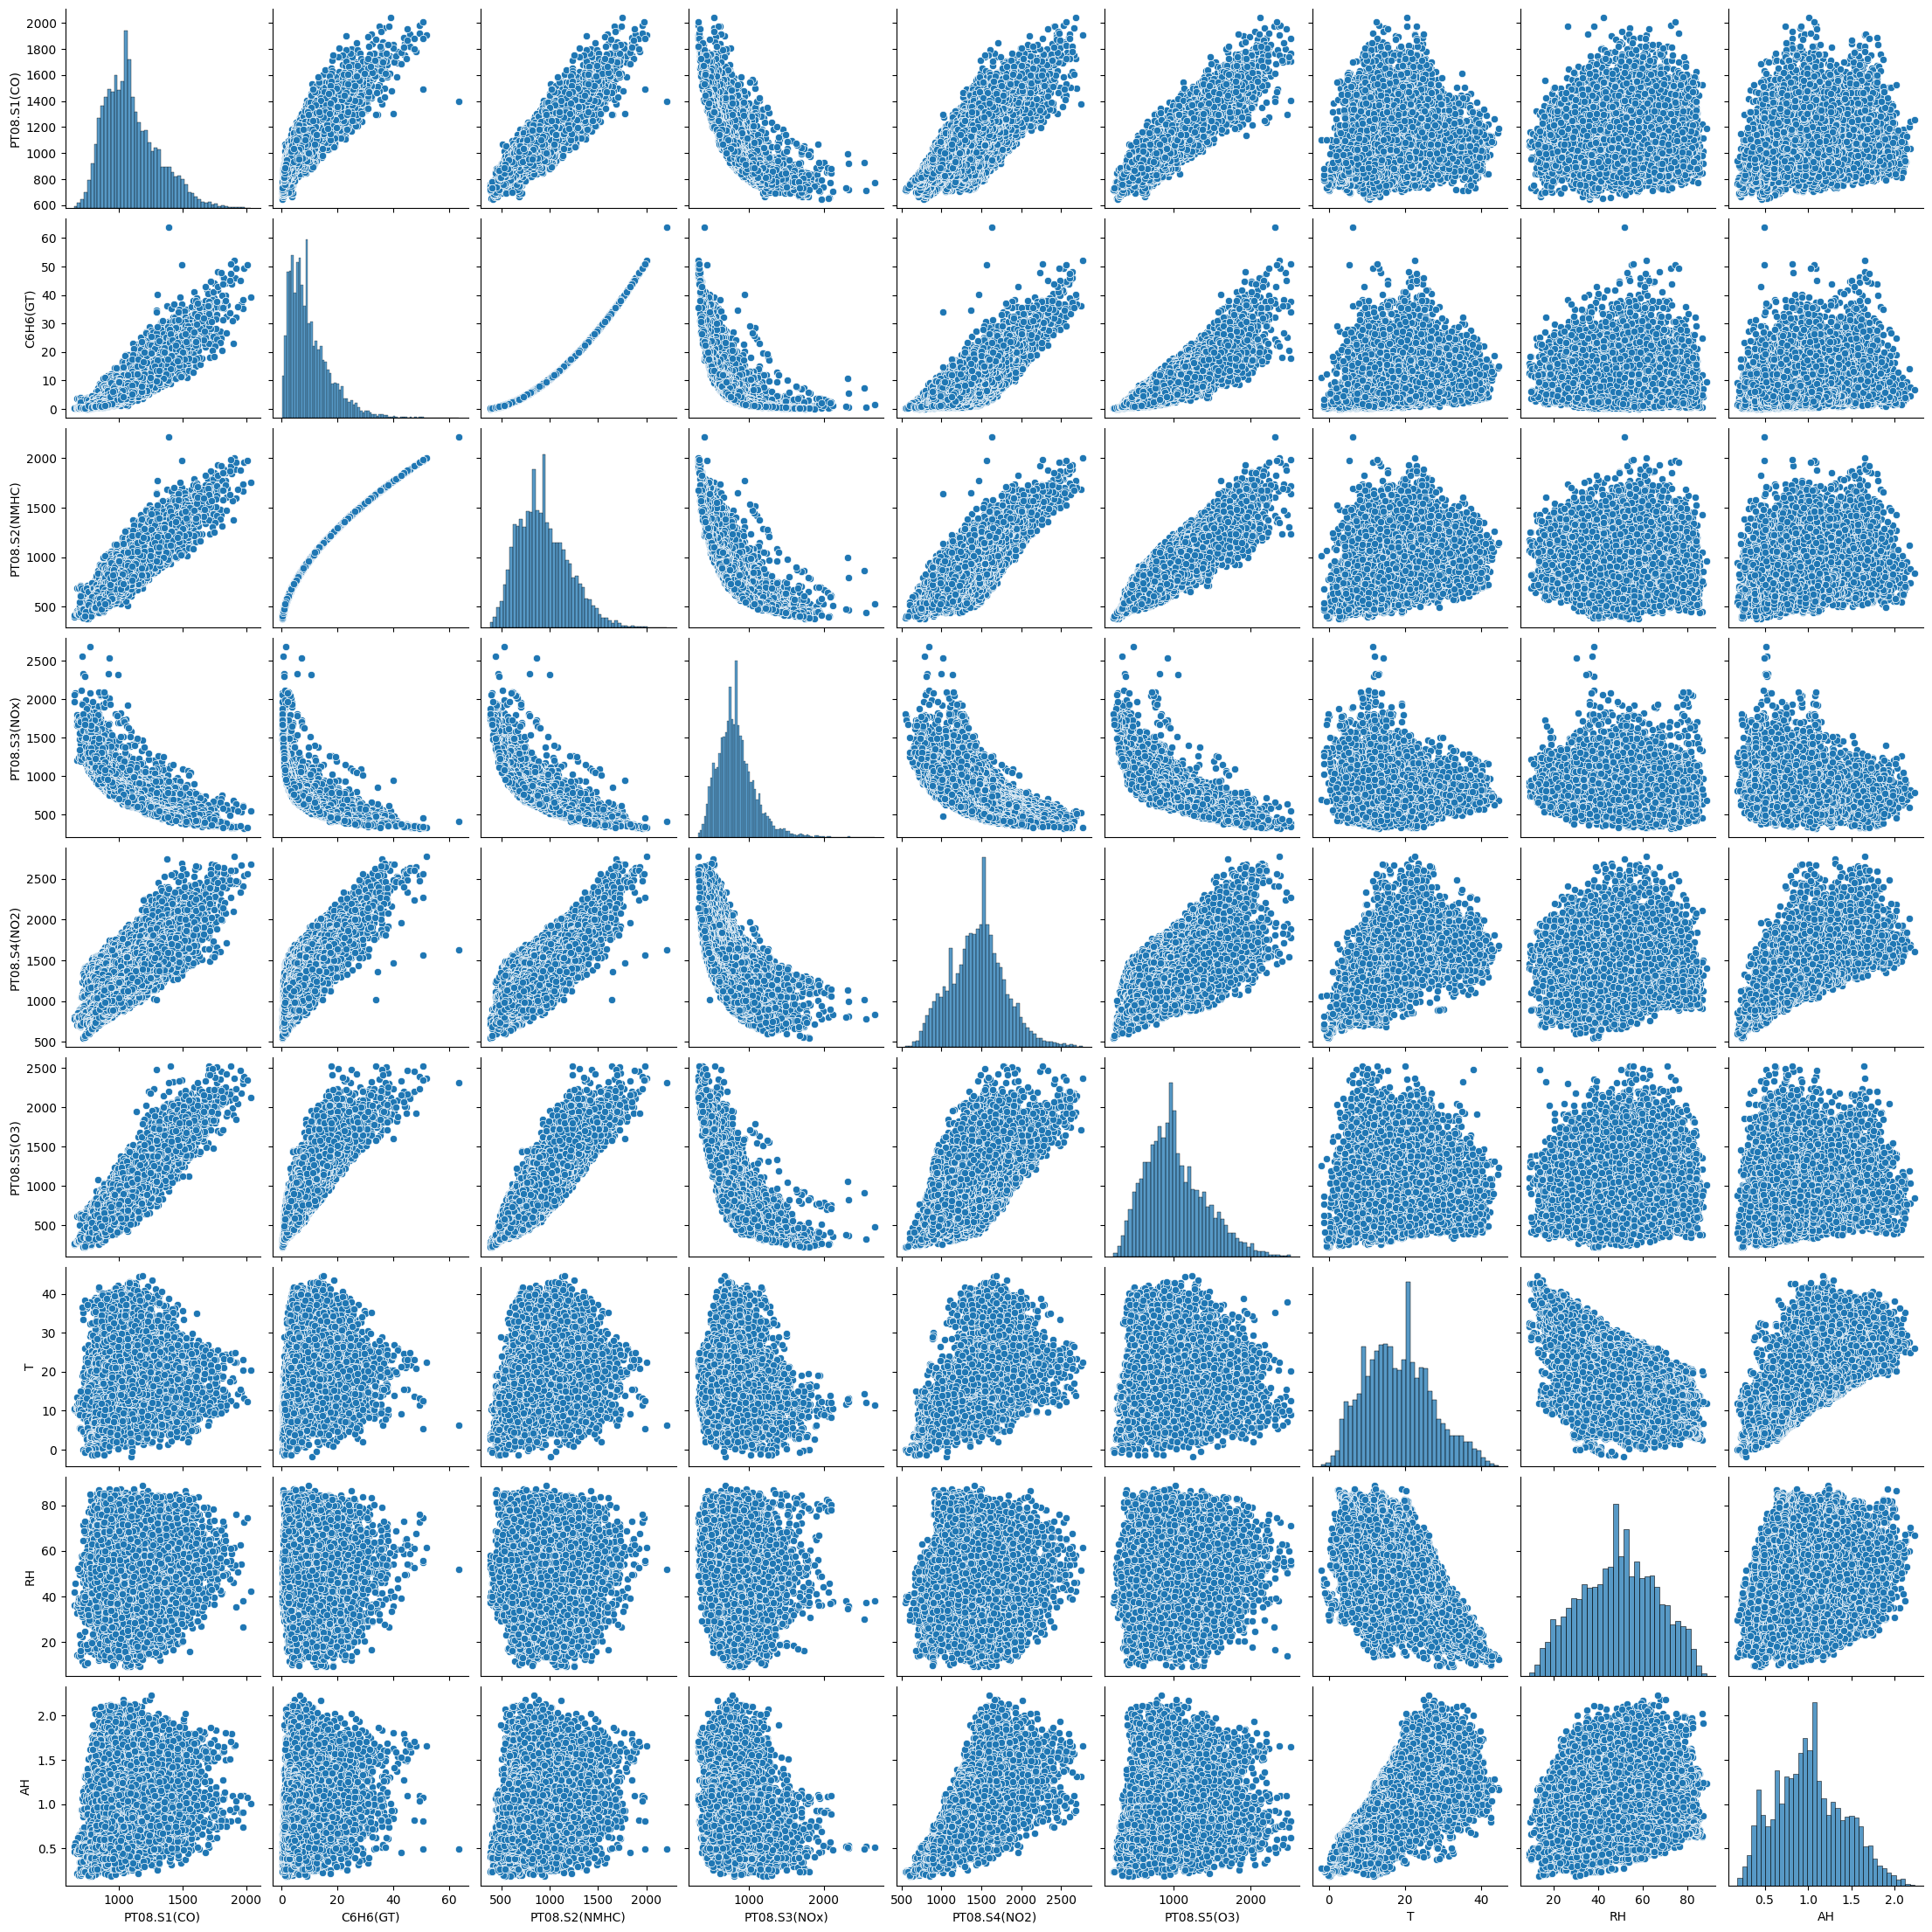

In [16]:
sns.pairplot(df.iloc[:, 1:-4])
plt.show()

Look at the scatter plot between NMHC (Non-Methane Hydrocarbons) and $\text{C}_6 \text{H}_6$ (Benzene). They have a perfectly smooth curve which tells us that as the concentration of NMHC increases, the concentration of benzene also increases. This makes a lot of sense because benzene is a non-methane hydrocarbon. It does not contain a methane group either in its structure.

---

The correlation coefficient value should only be used for making best guesses. E.g., if the carbon monoxide value is 1200 units, then there is a high probability that the nitrogen oxides value would be somewhere between 700 and 1000 units.

 Strength of correlation in most of the cases

   - If $R \ge 0.7$ or $R \le -0.7$, then there is a strong correlation.

   - If $0.5 \le R < 0.7$ or $-0.7 < R \le -0.5$, then there is a moderate correlation.

   - In other cases, there is a weak correlation. These ranges for correlation coefficient are just guidelines, not rules. Hence, these can be altered according to the problem statements.

---

Scatter plot between the temperature and absolute humidity columns using the `scatterplot()` function of the `seaborn`.

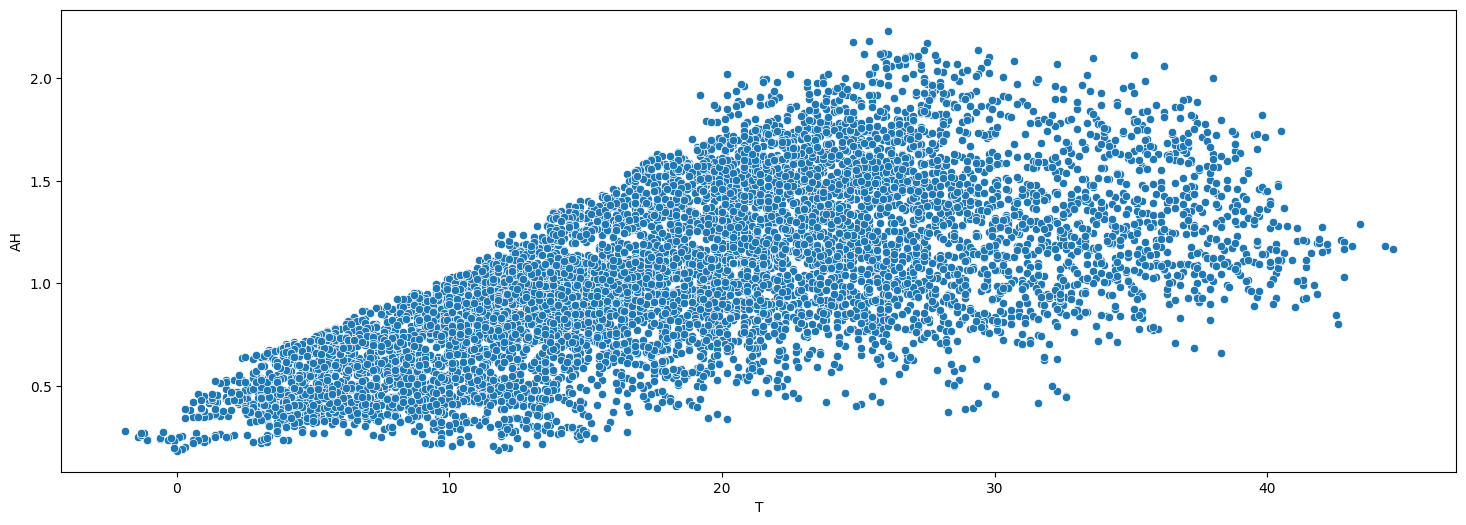

In [17]:
plt.figure(figsize=(18, 6))
sns.scatterplot(x='T', y='AH', data=df)
plt.show()

We can see that the temperature and absolute humidity also have a positive correlation.


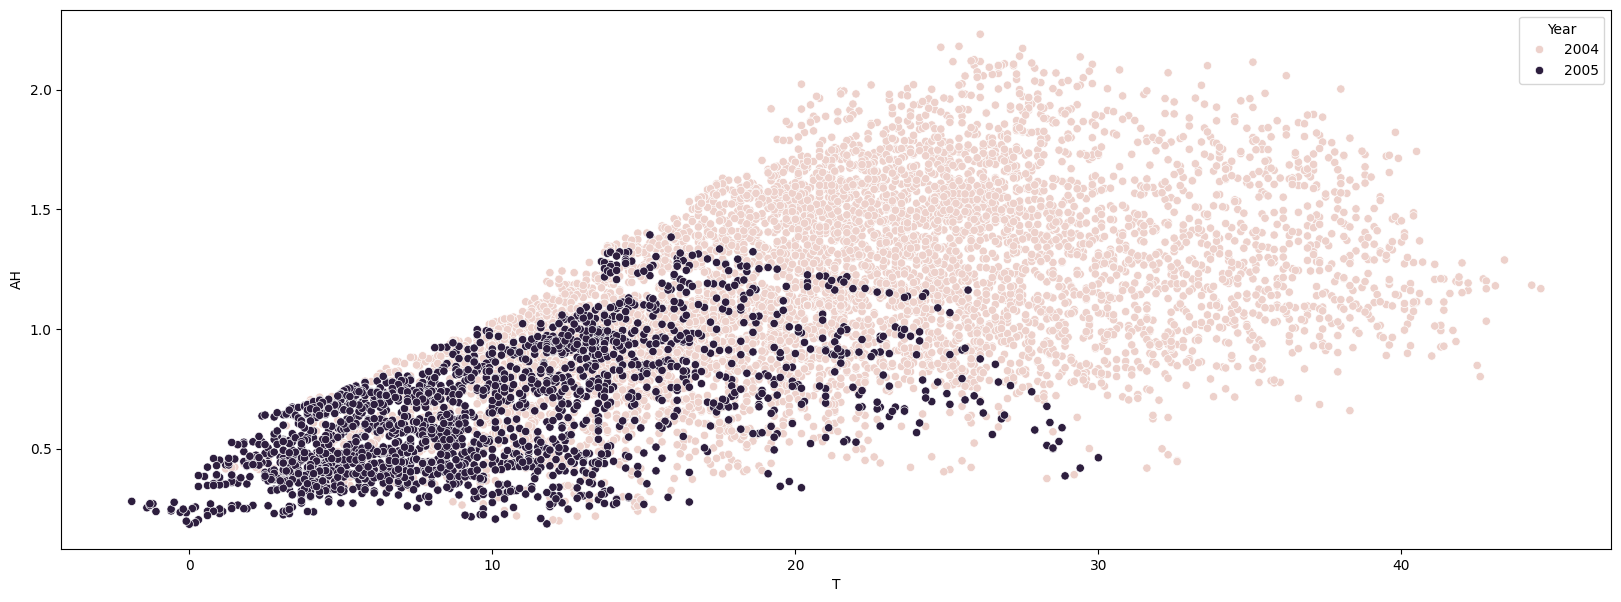

In [18]:
plt.figure(figsize=(20, 7))
sns.scatterplot(x='T', y='AH', hue='Year', data=df)
plt.show()

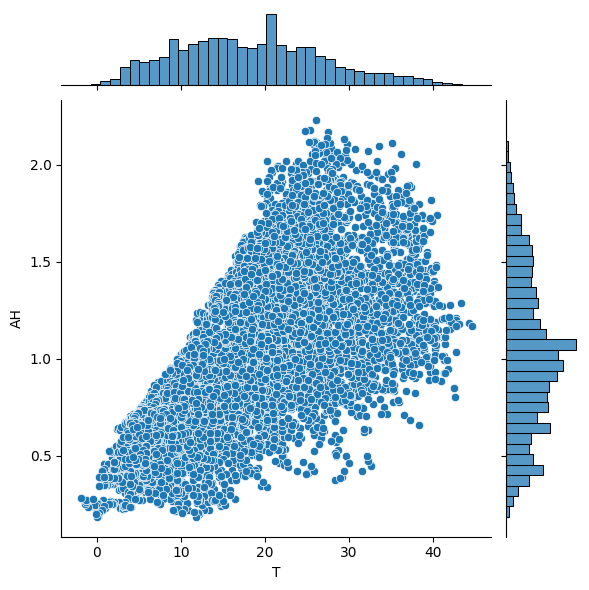

In [19]:
sns.jointplot(x='T', y='AH', data=df, kind='scatter')
plt.show()

On top of the joint plot, there is a histogram for the temperature column. Similarly, on the right-hand side of the joint plot, there is a histogram for the absolute humidity columns.


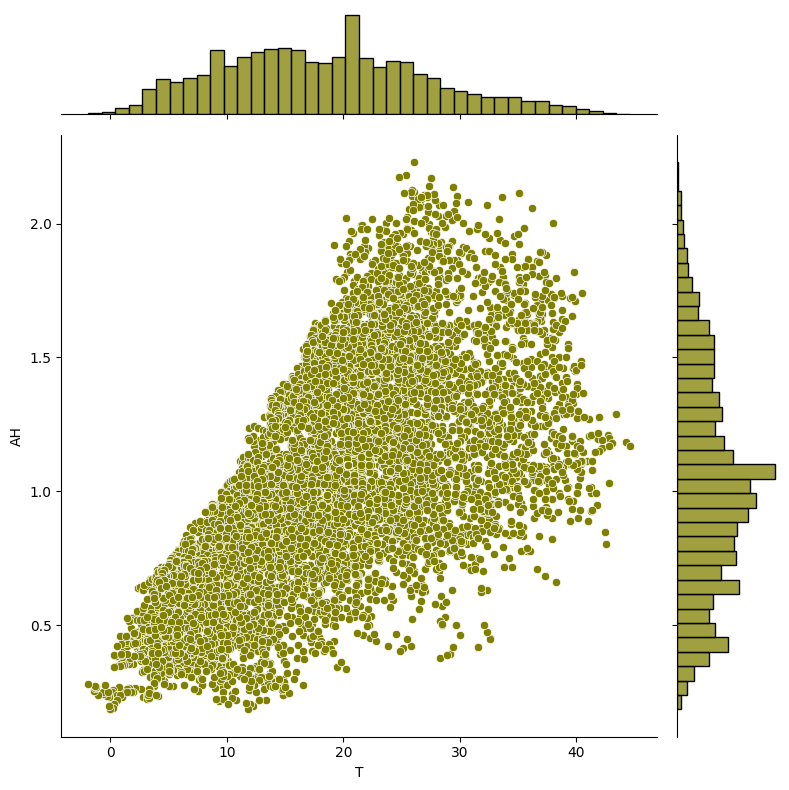

In [20]:
sns.jointplot(x='T', y='AH', data=df, kind='scatter', color='olive', height=8)
plt.show()

---